<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Michael!

I'm happy to review your project today.  🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments: </div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
    
Hello Michael,

You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. 
    
You’ll find specific feedback in the notebook in the ‘Comments’ (`Reviewer's comment v1`) sections.
    
**What Was Great:**

- You demonstrated a thorough approach to data loading, preparation, and cleaning, ensuring the data was in optimal shape for analysis.
    
**Areas to Improve:**

- Add data rounding for calls and internet data. 
- Formulate hypotheses.
- Complete analysis for all services and add interim and overall conclusions. 
   
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
I appreciate the effort you have put into revising your project.  There are no issues left, so your project has been accepted. I wish you engaging projects in the upcoming sprints! ☘️
    
PS: As a final note, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  
    
Another great self-paced course that covers basic concepts in probability and statistics - Probability and Statistics by Stanford Online or you could check this one [An Introduction to Statistical Learning with Applications in R](https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/) 🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

Project Title
Megaline Plans a Statistical Data Analysis

Overview
Utilizing datasets of mobile plans and user behavior, a statistical data anaylsis will be used to determine which plan brings in more revenue.

Description of Datasets
calls - data on calls including date and duration
internet - data on internet usage including date and data usage
messages - data on messages including date and user
plans - data on available plans
users - data on users, including their plan

Strategy
Import datasets
Convert data to necessary types
Find and eliminate errors in the data
The number of calls made and minutes used per month
The number of text messages sent per month
The volume of data per month
The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)
Analyze the user behavior
Test the Hypotheses

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import math



## Load data

In [2]:
# Load the data files into different DataFrames
# Read CSVs with Pandas:
# df = pd.read_csv('')

calls_df = pd.read_csv('/datasets/megaline_calls.csv', sep=',')
internet_df = pd.read_csv('/datasets/megaline_internet.csv', sep=',')
messages_df = pd.read_csv('/datasets/megaline_messages.csv', sep=',')
plans_df = pd.read_csv('/datasets/megaline_plans.csv', sep=',')
users_df = pd.read_csv('/datasets/megaline_users.csv', sep=',')

## Prepare the data

This section will examine each data table. Any necessary corrections will be completed, including:
Convert to necessary data types
Find and eliminate errors in the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

print(plans_df.info())
print()
print(plans_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000       

In [4]:
# Print a sample of data for plans
print(plans_df.head(10))
print('')
print('Verifying that there are no issues with mixed cases:')
print(plans_df['plan_name'].unique())
print('')
print('Number of duplicates:')
print(plans_df.duplicated().sum())
print('')
print('Number of missing:')
print(plans_df.isna().sum())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Verifying that there are no issues with mixed cases:
['surf' 'ultimate']

Number of duplicates:
0

Number of missing:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

plans
- all types are correct and expected
- no duplicate values
- no missing values
- no issues with mixed plan names found
- both mb and gb are used, conversion will need to be made

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [5]:
# convert from mb to gb
plans_df['gb_included']=plans_df['mb_per_month_included']/1000

print(plans_df.head(10))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_included  
0        15.36  
1        30.72  


## Users

In [6]:
# Print the general/summary information about the users' DataFrame

print('users')
print(users_df.info())
print()
print(users_df.describe())

users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [7]:
# Print a sample of data for users

print(users_df.head(5))
print()
print('Verifying that there are no issues with mixed cases:')
print(
    users_df['first_name'].str.isupper().sum()
    +users_df['last_name'].str.isupper().sum()
    +users_df['city'].str.isupper().sum()
    +users_df['city'].str.isupper().sum())
print('')
print('Number of duplicates:')
print(users_df.duplicated().sum())
print('')
print('Number of missing:')
print(users_df.isna().sum())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

Verifying that there are no issues with mixed cases:
0

Number of duplicates:
0

Number of missing:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

users - all types are correct and expected
- check for missing values
- convert to lowercase
- check for duplicates

Issues:
churn_date contains 466 missing, however, these are naturally occuring and are not showing a problem with the data

Enrichment:
reg_date convert to date type
churn_date convert to date type

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [8]:
users_df['region']=users_df['city'].str[-6:-4]

print(users_df['region'].head(10))

0    GA
1    WA
2    NV
3    OK
4    WA
5    TX
6    CA
7    MI
8    FL
9    CA
Name: region, dtype: object


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [9]:
#####reg_date convert from object to date
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
#####churn_date convert from object to date
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

#verifying results
#print(users_df.info())
#print(users_df.head(2))

## Calls

In [10]:
# Print the general/summary information about the calls' DataFrame

print('calls')
print(calls_df.info())
print()
print(calls_df.describe())

calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [11]:
# Print a sample of data for calls

print(calls_df.head(5))
print('')
print('Number of duplicates:')
print(calls_df.duplicated().sum())
print('')
print('Number of missing:')
print(calls_df.isna().sum())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

Number of duplicates:
0

Number of missing:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]


Enrichment:
- call_date convert to date type
- round duration up to nearest integer

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [12]:
#call_date convert from object to date
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

#Extract year and month
calls_df['year_month'] = calls_df['call_date'].dt.to_period('M')

calls_df['duration_round']= calls_df['duration'].apply(math.ceil)

print(calls_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              137735 non-null  object        
 1   user_id         137735 non-null  int64         
 2   call_date       137735 non-null  datetime64[ns]
 3   duration        137735 non-null  float64       
 4   year_month      137735 non-null  period[M]     
 5   duration_round  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 6.3+ MB
None


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>

Please note that the telecom operator rounds up all minutes. 

`Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.`

Can you please add data rounding for calls before the data aggregation.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>

Well done! Data rounding is correct now. 


## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame

print('messages')
print(messages_df.info())
print()
print(messages_df.describe())

messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [14]:
# Print a sample of data for messages

print(messages_df.head(5))
print('')
print('Number of duplicates:')
print(messages_df.duplicated().sum())
print('')
print('Number of missing:')
print(messages_df.isna().sum())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

Number of duplicates:
0

Number of missing:
id              0
user_id         0
message_date    0
dtype: int64


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Enrichment:
message_date to type date

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [15]:
#####message_date convert from object to date
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

messages_df['year_month'] = messages_df['message_date'].dt.to_period('M')

print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year_month    76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB
None


## Internet

In [16]:
# Print the general/summary information about the internet DataFrame

print('internet')
print(internet_df.info())
print()
print(internet_df.describe())

internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [17]:
# Print a sample of data for the internet traffic

print(internet_df.head(5))
print('')
print('Number of duplicates:')
print(internet_df.duplicated().sum())
print('')
print('Number of missing:')
print(internet_df.isna().sum())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

Number of duplicates:
0

Number of missing:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Internet
- no duplicates
- no missing
- session_date to type date
- Convert mb to gb and round up to nearest integer

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [18]:
#####session_date convert from object to date
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

internet_df['year_month'] = internet_df['session_date'].dt.to_period('M')

# Convert mb to gb and round up
internet_df['gb_used'] = internet_df['mb_used']/1000 #convert mb to gb

print(messages_df.info())

print(internet_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year_month    76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB
None
         id  user_id session_date  mb_used year_month  gb_used
0   1000_13     1000   2018-12-29    89.86    2018-12  0.08986
1  1000_204     1000   2018-12-31     0.00    2018-12  0.00000
2  1000_379     1000   2018-12-28   660.40    2018-12  0.66040
3  1000_413     1000   2018-12-26   270.99    2018-12  0.27099
4  1000_442     1000   2018-12-27   880.22    2018-12  0.88022
5    1001_0     1001   2018-08-24   284.68    2018-08  0.28468
6    1001_3     1001   2018-12-09   656.04    2018-12  0.65604


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

# Print out the plan conditions and make sure they are clear for you

Surf
- Monthly charge: $20
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
- 1 minute: 3 cents
- 1 text message: 3 cents
- 1 GB of data: $10

Ultimate
- Monthly charge: $70
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: $7

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. 

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [19]:
# Calculate the number of calls made by each user per month. Save the result.

# Group by user_id and year_month, then count the calls
calls_per_month = calls_df.groupby(['user_id', 'year_month']).size().reset_index(name='call_count')

# Display the result
print(calls_per_month)

      user_id year_month  call_count
0        1000    2018-12          16
1        1001    2018-08          27
2        1001    2018-09          49
3        1001    2018-10          65
4        1001    2018-11          64
...       ...        ...         ...
2253     1498    2018-12          39
2254     1499    2018-09          41
2255     1499    2018-10          53
2256     1499    2018-11          45
2257     1499    2018-12          65

[2258 rows x 3 columns]


In [20]:
# Calculate the amount of minutes spent by each user per month. Save the result.

min_per_month = calls_df.groupby(['user_id','year_month'])['duration_round'].sum().reset_index(name='min_total')

print(min_per_month.head(10))


   user_id year_month  min_total
0     1000    2018-12        124
1     1001    2018-08        182
2     1001    2018-09        315
3     1001    2018-10        393
4     1001    2018-11        426
5     1001    2018-12        412
6     1002    2018-10         59
7     1002    2018-11        386
8     1002    2018-12        384
9     1003    2018-12       1104


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:


```
# Group by and aggregate
result = calls_df.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()

# Flatten the MultiIndex in columns
result.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in result.columns.values]
result
```

In [21]:
# Calculate the number of messages sent by each user per month. Save the result.

messages_per_month = messages_df.groupby(['user_id','year_month']).size().reset_index(name='message_count')

# Display the result
print(messages_per_month.head(10))

   user_id year_month  message_count
0     1000    2018-12             11
1     1001    2018-08             30
2     1001    2018-09             44
3     1001    2018-10             53
4     1001    2018-11             36
5     1001    2018-12             44
6     1002    2018-10             15
7     1002    2018-11             32
8     1002    2018-12             41
9     1003    2018-12             50


In [22]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_traffic_per_month = internet_df.groupby(['user_id','year_month'])['gb_used'].sum().reset_index(name='total_gb')

print(internet_traffic_per_month.head(10))

   user_id year_month  total_gb
0     1000    2018-12   1.90147
1     1001    2018-08   6.91915
2     1001    2018-09  13.31482
3     1001    2018-10  22.33049
4     1001    2018-11  18.50430
5     1001    2018-12  19.36918
6     1002    2018-10   6.55201
7     1002    2018-11  19.34508
8     1002    2018-12  14.39624
9     1003    2018-12  27.04414


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [23]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

merge_data = pd.merge(calls_per_month, min_per_month, on=['user_id','year_month'], how='outer')

merge_data = pd.merge(merge_data, messages_per_month, on=['user_id','year_month'], how='outer')

merge_data = pd.merge(merge_data, internet_traffic_per_month, on=['user_id','year_month'], how='outer')

print(merge_data.head(10))

   user_id year_month  call_count  min_total  message_count  total_gb
0     1000    2018-12        16.0      124.0           11.0   1.90147
1     1001    2018-08        27.0      182.0           30.0   6.91915
2     1001    2018-09        49.0      315.0           44.0  13.31482
3     1001    2018-10        65.0      393.0           53.0  22.33049
4     1001    2018-11        64.0      426.0           36.0  18.50430
5     1001    2018-12        56.0      412.0           44.0  19.36918
6     1002    2018-10        11.0       59.0           15.0   6.55201
7     1002    2018-11        55.0      386.0           32.0  19.34508
8     1002    2018-12        47.0      384.0           41.0  14.39624
9     1003    2018-12       149.0     1104.0           50.0  27.04414


In [24]:
# Add the plan information

merge_data = merge_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')
merge_data = merge_data.merge(users_df[['user_id', 'region']], on='user_id', how='left')

merge_data = merge_data.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

print('Number of missing:')
print(merge_data.isna().sum())

#merge_data['total_gb']=merge_data['total_gb'].fillna(0,inplace=True)
#merge_data = merge_data.fillna(0,inplace=True)
merge_data['call_count'] = merge_data['call_count'].replace(np.nan, 0)
merge_data['min_total'] = merge_data['min_total'].replace(np.nan, 0)
merge_data['message_count'] = merge_data['message_count'].replace(np.nan, 0)
merge_data['total_gb'] = merge_data['total_gb'].replace(np.nan, 0)

#print(merge_data.describe())
print(merge_data.info())
#print(merge_data.head(10))

Number of missing:
user_id                    0
year_month                 0
call_count                35
min_total                 35
message_count            487
total_gb                  16
plan                       0
region                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
gb_included                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2293 non-null   int64    
 1   year_month             2293 non-null   period[M]
 2   call_count             2293 non-null   float64  
 3   min_total              2293 non-null   float64  
 4   message_count          2293 non-null   

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v1:</b>

As you can see, for customers who did not use a particular service, we have NaN values in the final table. 
    
When calculating the mean of a dataset, it is common to fill missing values (i.e. NaN) with 0. This is because the mean is calculated by summing up all of the values in a dataset and then dividing by the number of values. If there are missing values in the dataset, the sum will not include those values, and the mean will be calculated based on a smaller sample size. This can lead to a biased or misleading result.

NaN values represent missing or undefined data and can distort statistical calculations like mean and median. For example, in the dataset [NaN, 78.0, 78.0], ignoring the NaN results in a mean and median of 78.0, but including NaN makes these calculations undefined. Ignoring or appropriately replacing NaN values is essential for accurate statistics. Handling NaN values correctly ensures reliable mean, median, and other statistical measures.

Filling missing values with 0 allows the mean to be calculated on the full dataset, rather than just a subset of it, providing a more accurate representation of the data.

<div class="alert alert-info"> <b>Student comments: I'm not sure why fillna(0,inplace=True) did not work above</div> 

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Now everything is correct 🙌

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct now. Indeed, we need to use an `outer` join here.

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [25]:
# Calculate the monthly revenue for each user

def calculate_revenue(row):
    # Define usage and costs
    call_overage = max(0, row['min_total'] - row['minutes_included'])
    text_overage = max(0, row['message_count'] - row['messages_included'])
    data_overage = max(0, np.ceil((row['total_gb'] - row['mb_per_month_included']/1000))) #convert 1000mb=1gb

    additional_cost = (call_overage * row['usd_per_minute'] +
                       text_overage * row['usd_per_message'] +
                       data_overage * row['usd_per_gb'])

    return row['usd_monthly_pay'] + additional_cost

merge_data['monthly_revenue'] = merge_data.apply(calculate_revenue, axis=1)

print(merge_data['monthly_revenue'].head(10))

0     70.00
1     20.00
2     20.00
3     90.09
4     60.00
5     70.00
6     20.00
7     60.00
8     20.00
9    158.12
Name: monthly_revenue, dtype: float64


<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>

Everything is correct here.

Btw it is also possible to make the calculation of revenue a bit different `np.where` - https://numpy.org/doc/stable/reference/generated/numpy.where.html
    
```
np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read it here: https://www.pythonpool.com/numpy-clip/
 


<div class="alert alert-warning">
<b>Reviewer's comment v2:</b>
    
One minor remark is that you need to divide by 1024 to get GB.

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>

Everything is correct here, but results will be a bit different after adding data rounding. 

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

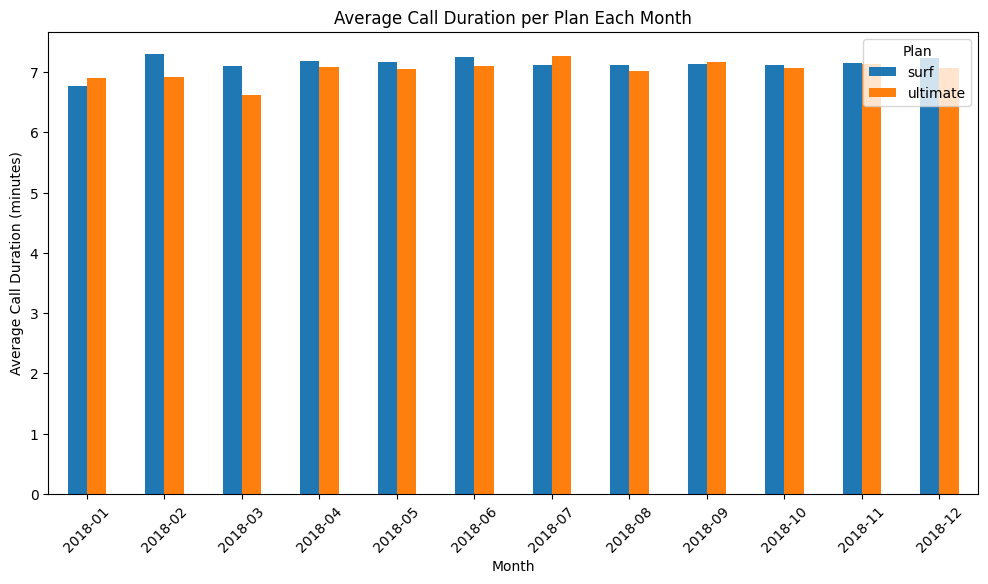

In [27]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Merge calls data with users to get plan information
calls_with_plans = pd.merge(calls_df, users_df[['user_id', 'plan']], on='user_id', how='left')

# Calculate the average call duration per plan per month
avg_duration_per_plan = calls_with_plans.groupby(['plan', 'year_month'])['duration_round'].mean().unstack('plan')

# Plot the bar plot
avg_duration_per_plan.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan Each Month')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability
plt.legend(title='Plan')
plt.show()

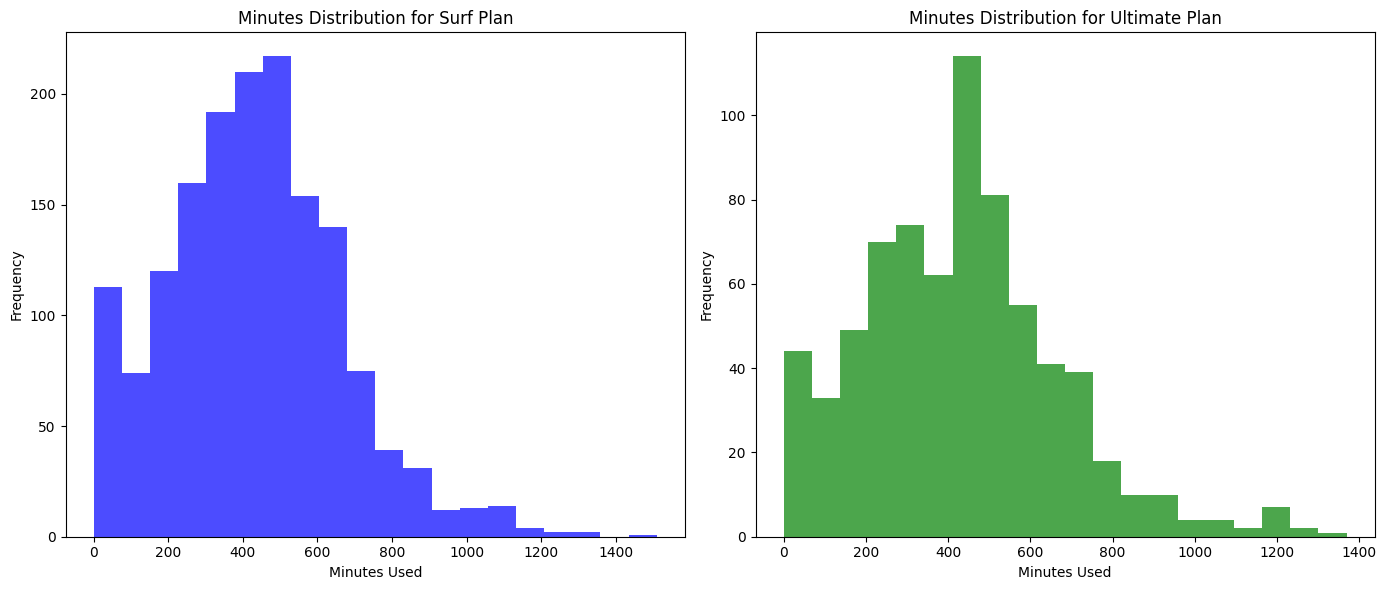

In [28]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Filter data for each plan
surf_data = merge_data[merge_data['plan'] == 'surf']
ultimate_data = merge_data[merge_data['plan'] == 'ultimate']

# Plotting
plt.figure(figsize=(14, 6))

# Surf Plan
plt.subplot(1, 2, 1)
plt.hist(surf_data['min_total'], bins=20, color='blue', alpha=0.7)
plt.title('Minutes Distribution for Surf Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')

# Ultimate Plan
plt.subplot(1, 2, 2)
plt.hist(ultimate_data['min_total'], bins=20, color='green', alpha=0.7)
plt.title('Minutes Distribution for Ultimate Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [29]:
# Calculate the mean and the variance of the monthly call duration

# Group by plan and year_month, then calculate mean and variance for min_total
call_stats = merge_data.groupby(['plan', 'year_month'])['min_total'].agg(['mean', 'var']).reset_index()

# Display the result
print(call_stats.head())

   plan year_month        mean           var
0  surf    2018-01  203.000000  15842.000000
1  surf    2018-02  297.000000  52226.500000
2  surf    2018-03  330.000000  35809.363636
3  surf    2018-04  351.540000  50866.743265
4  surf    2018-05  399.584416  59754.219754


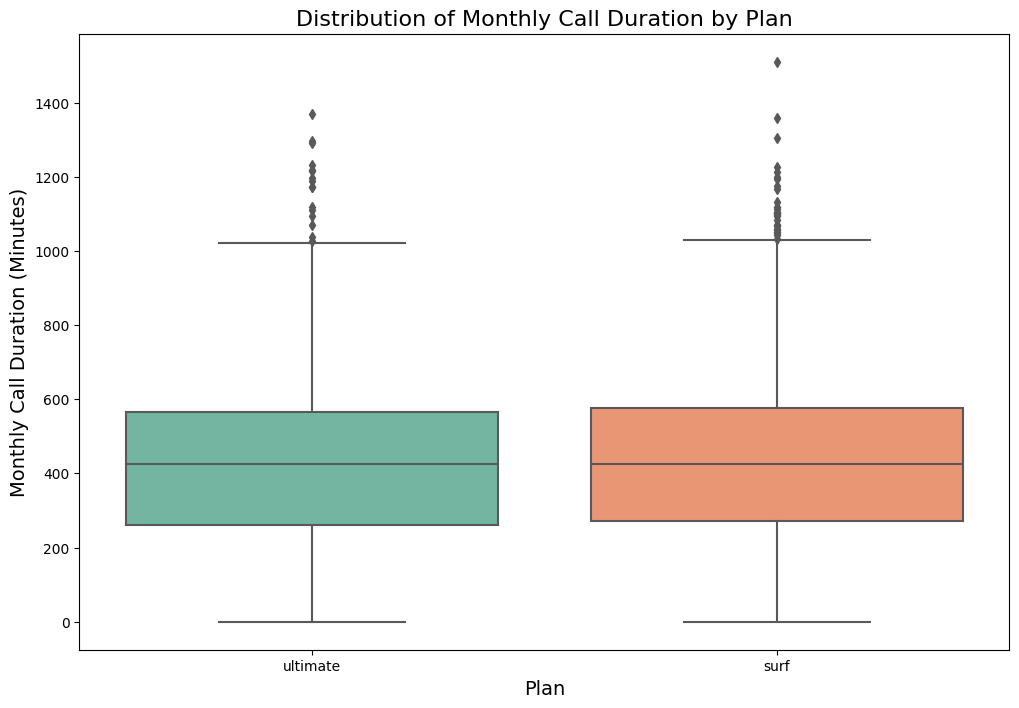

In [30]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Ensure the 'total_minutes' column exists
if 'min_total' not in merge_data.columns:
    raise ValueError("The dataset must include a 'min_total' column.")

# Create the boxplot
plt.figure(figsize=(12, 8))  # Adjusted to a more typical size
sns.boxplot(data=merge_data, x='plan', y='min_total', palette='Set2')

# Add title and labels
plt.title('Distribution of Monthly Call Duration by Plan', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Monthly Call Duration (Minutes)', fontsize=14)

# Show the plot
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great analysis! Like the structure and that you've used different types of charts to check data. 

### Messages

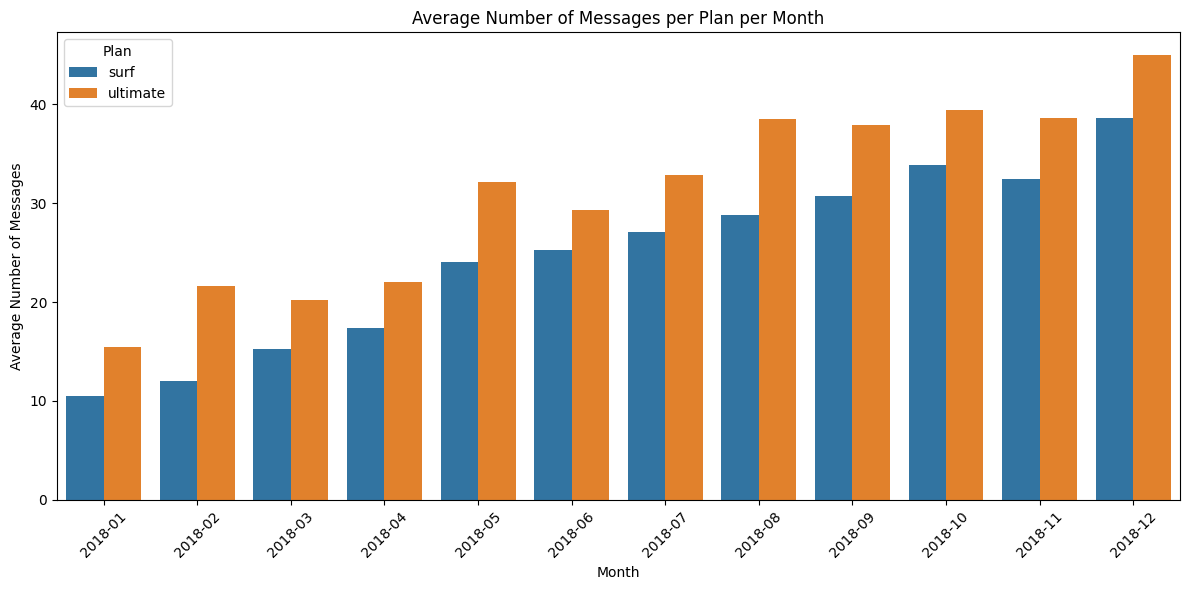

In [31]:
# Compare the number of messages users of each plan tend to send each month

# Calculate the average number of messages sent per plan per month
avg_messages = merge_data.groupby(['plan', 'year_month'])['message_count'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=avg_messages, x='year_month', y='message_count', hue='plan')

# Add a title and labels
plt.title('Average Number of Messages per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend(title='Plan')

# Display the plot
plt.tight_layout()
plt.show()

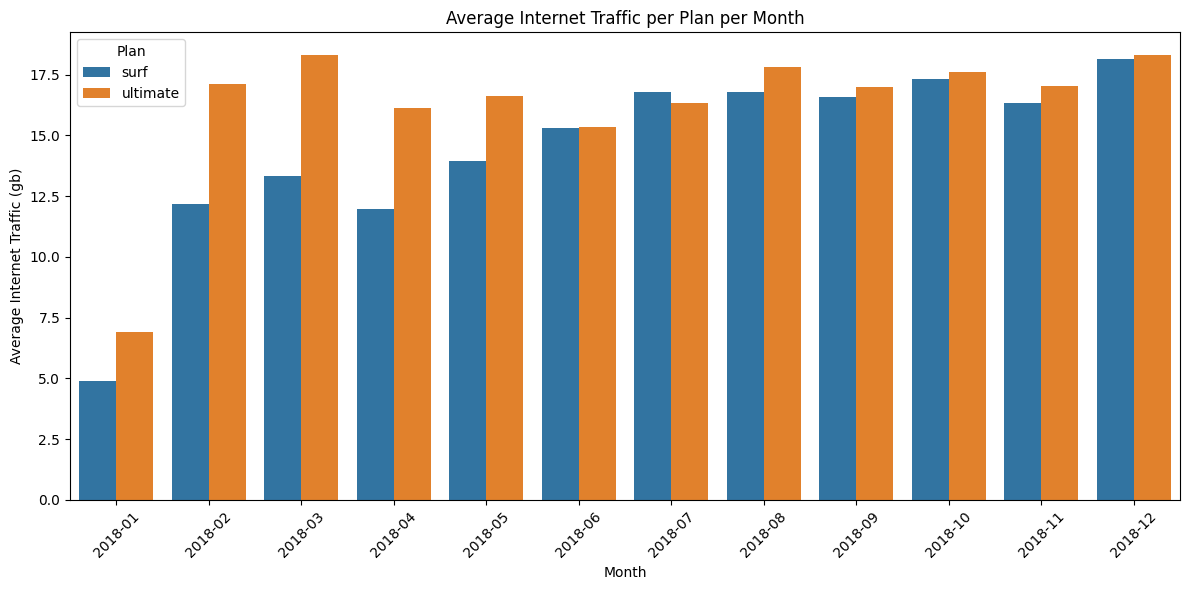

In [32]:
# Compare the amount of internet traffic consumed by users per plan

# Calculate the average internet traffic consumed per plan per month
avg_internet_usage = merge_data.groupby(['plan', 'year_month'])['total_gb'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=avg_internet_usage, x='year_month', y='total_gb', hue='plan')

# Add a title and labels
plt.title('Average Internet Traffic per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic (gb)')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend(title='Plan')

# Display the plot
plt.tight_layout()
plt.show()

In [33]:
#def get_stats

# Group by plan and calculate descriptive statistics for messages
message_stats = merge_data.groupby('plan')['message_count'].agg(['mean', 'median', 'var', 'std', 'min', 'max']).reset_index()

# Display the result
print(message_stats)

       plan       mean  median          var        std  min    max
0      surf  31.159568    24.0  1126.724522  33.566717  0.0  266.0
1  ultimate  37.551389    30.0  1208.756744  34.767179  0.0  166.0


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

Based on the data analysis performed, it appears that users from both plans have similar call behavious.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
To avoid repetitive code you could utilize functions. 

### Internet

In [34]:
# Group by plan and calculate descriptive statistics for internet
internet_stats = merge_data.groupby('plan')['total_gb'].agg(['mean', 'median', 'var', 'std', 'min', 'max']).reset_index()

# Display the result
print(internet_stats)
print()



       plan       mean    median        var       std  min       max
0      surf  16.558283  16.82931  64.216396  8.013513  0.0  70.93159
1  ultimate  17.214700  16.85834  61.652293  7.851897  0.0  46.59533



Based on the analysis performed, ultimate users tend to use more internet.
Internet usage grows over the year for both users types. 

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Could you please plot histograms and describe the distributions for each section: calls, messages, internet and revenue.   

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

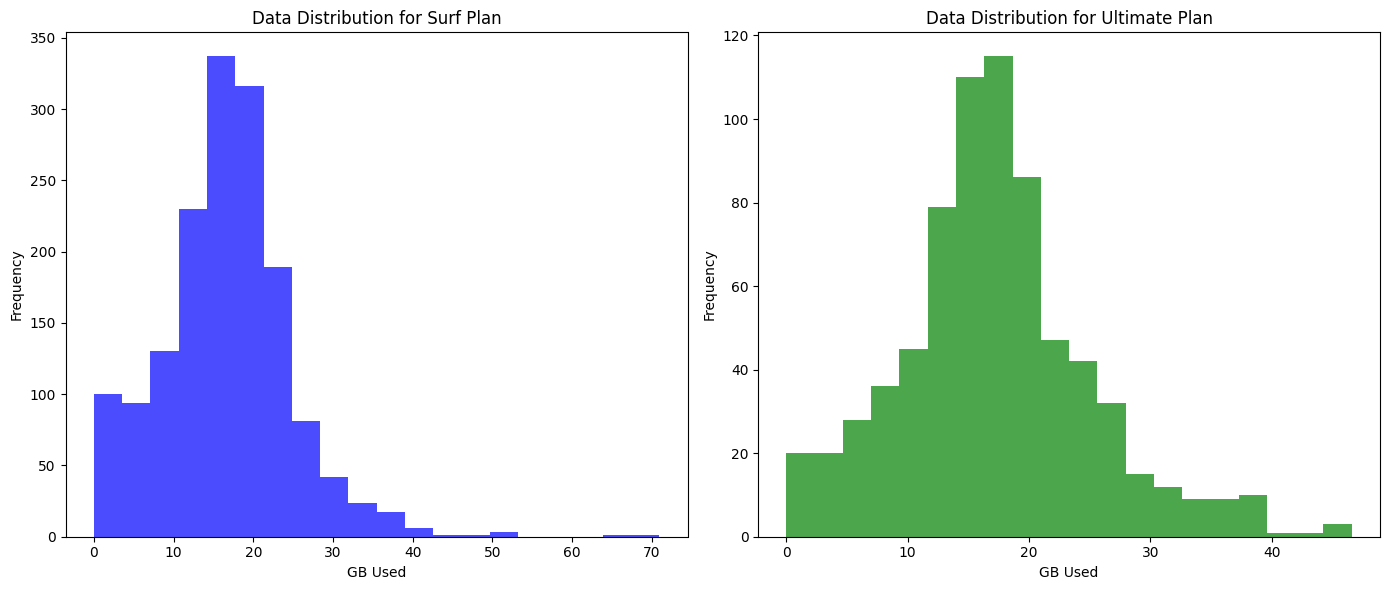

In [35]:
# Filter data for each plan
#surf_data = merge_data[merge_data['plan'] == 'surf']
#ultimate_data = merge_data[merge_data['plan'] == 'ultimate']

# Plotting
plt.figure(figsize=(14, 6))

# Surf Plan
plt.subplot(1, 2, 1)
plt.hist(surf_data['total_gb'], bins=20, color='blue', alpha=0.7)
plt.title('Data Distribution for Surf Plan')
plt.xlabel('GB Used')
plt.ylabel('Frequency')

# Ultimate Plan
plt.subplot(1, 2, 2)
plt.hist(ultimate_data['total_gb'], bins=20, color='green', alpha=0.7)
plt.title('Data Distribution for Ultimate Plan')
plt.xlabel('GB Used')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [36]:
# Group by plan and calculate descriptive statistics for monthly revenue
revenue_stats = merge_data.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'var', 'std', 'min', 'max']).reset_index()

# Display the result
print(revenue_stats)

       plan       mean  median          var        std   min     max
0      surf  61.431138   40.51  3198.677644  56.556853  20.0  600.37
1  ultimate  72.381944   70.00   137.638338  11.731937  70.0  182.00


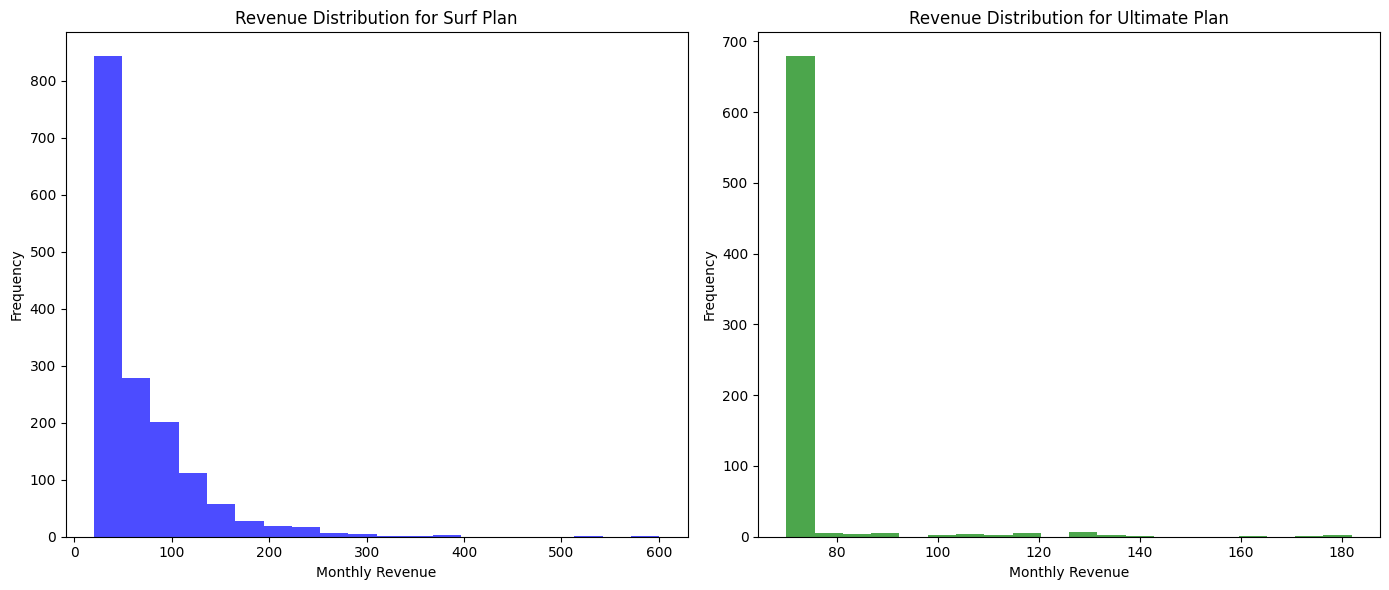

In [37]:
# Filter data for each plan
#surf_data = merge_data[merge_data['plan'] == 'surf']
#ultimate_data = merge_data[merge_data['plan'] == 'ultimate']

# Plotting
plt.figure(figsize=(14, 6))

# Surf Plan
plt.subplot(1, 2, 1)
plt.hist(surf_data['monthly_revenue'], bins=20, color='blue', alpha=0.7)
plt.title('Revenue Distribution for Surf Plan')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')

# Ultimate Plan
plt.subplot(1, 2, 2)
plt.hist(ultimate_data['monthly_revenue'], bins=20, color='green', alpha=0.7)
plt.title('Revenue Distribution for Ultimate Plan')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

Revenue for the surf plan is noticably higher. Though there is a wide range of why users exceed their limit, this causes the surf plan to generate more revenue.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. It's great that you combined both plans in one graph for comparison and also used different graph types to check the available data.
- If you have time and are willing to practice, you can display two charts (a histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differ:

Formulating Hypotheses:
Null Hypothesis (( H_0 )):
The average revenue from users of the Ultimate and Surf calling plans is the same.
Mathematically: ( \mu{\text{Ultimate}} = \mu{\text{Surf}} )
Alternative Hypothesis (( H_a )):
The average revenue from users of the Ultimate and Surf calling plans is different.
Mathematically: ( \mu{\text{Ultimate}} \neq \mu{\text{Surf}} )

Choosing the Statistical Test:
Independent t-test: Suitable for comparing means between two independent groups (Ultimate and Surf plans).
Assume revenues are normally distributed or use the Central Limit Theorem if the sample size is large.

Decide on Alpha Value:
Significance Level ((\alpha)): Commonly set at 0.05. This level means you're willing to accept a 5% chance of rejecting the null hypothesis when it's actually true.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0:
    H1:

In [38]:
# Test the hypotheses

# Extract revenue data for each plan
surf_revenue = merge_data[merge_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = merge_data[merge_data['plan'] == 'ultimate']['monthly_revenue']

# Perform independent t-test
t_stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)  # Use equal_var=False if variances are unequal

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the plans.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue between the plans.")

T-statistic: -7.3420098734369965
P-value: 3.140022256428878e-13
Reject the null hypothesis: There is a significant difference in average revenue between the plans.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from other regions.

Null Hypothesis (( H_0 )):
The average revenue from users in the NY-NJ area is the same as the average revenue from users in other regions.
Mathematically: ( \mu{\text{NY-NJ}} = \mu{\text{Others}} )
Alternative Hypothesis (( H_a )):
The average revenue from users in the NY-NJ area is different from the average revenue from users in other regions.
Mathematically: ( \mu{\text{NY-NJ}} \neq \mu{\text{Others}} )

Choosing the Statistical Test:
Independent t-test: This test is suitable for comparing means of two independent groups (NY-NJ vs. others).

Decide on Alpha Value:
Significance Level ((\alpha)): Typically set to 0.05.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0:
    H1:

In [39]:
# Test the hypotheses

# Filter data for the NY-NJ area and other regions
ny_nj_revenue = merge_data[merge_data['region'].isin(['NY', 'NJ'])]['monthly_revenue']
other_revenue = merge_data[~merge_data['region'].isin(['NY', 'NJ'])]['monthly_revenue']

# Perform independent t-test
t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)  # Use equal_var=False for unequal variance

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between NY-NJ and other regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue between NY-NJ and other regions.")

T-statistic: 0.8951890296638169
P-value: 0.37818812329711904
Fail to reject the null hypothesis: No significant difference in average revenue between NY-NJ and other regions.


<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Second one should be still updated based on the new filtering logic i've shared. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

A thurough anaylsis was performed of Megaline usage. Key take-aways were found:
Both  plans have similar call patterns.
Ultimate users use more data.
There is a significant difference in average revenue between the plans.
Revenue for the surf plan is noticeably higher, resulting from fees caused by overages. 
No significant difference in average revenue between NY-NJ and other regions.


<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v1:</b>
    
You did great research with clean code, cool graphs, and correct intermediate conclusions. However, general conclusions in this case are a mini-presentation of the entire work in front of a business stakeholder. In a real project, this is probably the only thing that a business stakeholder will read. Therefore, it is necessary to indicate detailed comments in a structured way for all the conclusions that you received on each item of the work. It is also worth considering what will be interesting from the business stakeholder's perspective, such as a detailed description of the user for each plan,  who brings more additional revenue, and who brings more in total.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Thank you for adding it. 